Code: Use Pandas to read the CSV file and store them in a DataFrame object named badminton2.
Next, it will display the data frame.

In [1]:
import pandas as pd

# Read data from csv file and display the data
badminton2 = pd.read_csv('badmintondata2.csv', header='infer')

badminton2

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres
0,4,1,10,40,-50,4.076522,0.908805,2.662589
1,4,1,10,40,-50,4.151082,0.819947,2.725236
2,4,1,10,40,-50,4.227713,0.728623,2.786250
3,4,1,10,40,-50,4.303163,0.638705,2.845674
4,4,1,10,40,-50,4.376557,0.551237,2.904019
...,...,...,...,...,...,...,...,...
242395,0,0,0,0,0,0.000000,0.000000,0.000000
242396,0,0,0,0,0,0.000000,0.000000,0.000000
242397,0,0,0,0,0,0.000000,0.000000,0.000000
242398,0,0,0,0,0,0.000000,0.000000,0.000000


Check Data Types

In [2]:
badminton2.dtypes

HUMAN PLAYER POSITION (X) metres                 int64
HUMAN PLAYER POSITION (Y) metres                 int64
INITITAL VELOCITY OF SHUTTELCOCK(m/s)            int64
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)        int64
SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)      int64
SHUTTLECOCK POSITIION IN AIR(X ) metres        float64
SHUTTLECOCK POSITIION IN AIR(Y) metres         float64
SHUTTLECOCK POSITIION IN AIR(Z) metres         float64
dtype: object

Identify if there is any Missing Data in the attributes

In [3]:
print(badminton2.isnull().sum())

HUMAN PLAYER POSITION (X) metres               0
HUMAN PLAYER POSITION (Y) metres               0
INITITAL VELOCITY OF SHUTTELCOCK(m/s)          0
INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)      0
SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)    0
SHUTTLECOCK POSITIION IN AIR(X ) metres        0
SHUTTLECOCK POSITIION IN AIR(Y) metres         0
SHUTTLECOCK POSITIION IN AIR(Z) metres         0
dtype: int64


Initialize SHOT ID to each group

In [4]:
# Create boolean mask if all row values are 0
mask = (badminton2 == 0).all(axis=1)

# Identify where the 'all zeros' condition changes
changes = mask.ne(mask.shift())

# Cumulatively sum these changes, assign SHOT_ID to each group
badminton2['SHOT_ID'] = changes.cumsum()

# For 'all zero' rows, assign SHOT_ID as 0
badminton2.loc[mask, 'SHOT_ID'] = 0

Identify Duplicate Data

In [5]:
# Check whether each row is a duplicate of a previous row in the table
dups = badminton2.duplicated()

dups

0         False
1         False
2         False
3         False
4         False
          ...  
242395     True
242396     True
242397     True
242398     True
242399     True
Length: 242400, dtype: bool

In [6]:
# Show duplicated rows
duplicate = badminton2[badminton2.duplicated()]

duplicate

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,SHOT_ID
129,0,0,0,0,0,0.0,0.0,0.0,0
130,0,0,0,0,0,0.0,0.0,0.0,0
131,0,0,0,0,0,0.0,0.0,0.0,0
132,0,0,0,0,0,0.0,0.0,0.0,0
133,0,0,0,0,0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
242395,0,0,0,0,0,0.0,0.0,0.0,0
242396,0,0,0,0,0,0.0,0.0,0.0,0
242397,0,0,0,0,0,0.0,0.0,0.0,0
242398,0,0,0,0,0,0.0,0.0,0.0,0


The results suggest there are 112715 duplicate rows in the dataset.

In [7]:
# Drop duplicate data
print('Number of rows before discarding duplicates = %d' % (badminton2.shape[0]))
data2 = badminton2.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))

Number of rows before discarding duplicates = 242400
Number of rows after discarding duplicates = 129685


Remove rows that are all zeros

In [8]:
# Remove the data row if all values are zeros
data2 = data2.loc[~(data2==0).all(axis=1)]

data2

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,SHOT_ID
0,4,1,10,40,-50,4.076522,0.908805,2.662589,1
1,4,1,10,40,-50,4.151082,0.819947,2.725236,1
2,4,1,10,40,-50,4.227713,0.728623,2.786250,1
3,4,1,10,40,-50,4.303163,0.638705,2.845674,1
4,4,1,10,40,-50,4.376557,0.551237,2.904019,1
...,...,...,...,...,...,...,...,...,...
242235,4,4,70,70,50,9.276323,10.288077,3.041504,2423
242236,4,4,70,70,50,9.326762,10.348188,2.466079,2423
242237,4,4,70,70,50,9.373273,10.403617,1.861569,2423
242238,4,4,70,70,50,9.414002,10.452156,1.230060,2423


Remove abnormal values (Value is Negative or Value = 0)

In [9]:
# Keep the data only when all data value is positive number
data2 = data2[(data2[data2.columns] >= 0).all(axis=1)]

data2

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,SHOT_ID
10000,4,1,10,40,0,4.074748,1.000000,2.664781,101
10001,4,1,10,40,0,4.152552,1.000000,2.727645,101
10002,4,1,10,40,0,4.225975,1.000000,2.787371,101
10003,4,1,10,40,0,4.302336,1.000000,2.847031,101
10004,4,1,10,40,0,4.377311,1.000000,2.905658,101
...,...,...,...,...,...,...,...,...,...
242235,4,4,70,70,50,9.276323,10.288077,3.041504,2423
242236,4,4,70,70,50,9.326762,10.348188,2.466079,2423
242237,4,4,70,70,50,9.373273,10.403617,1.861569,2423
242238,4,4,70,70,50,9.414002,10.452156,1.230060,2423



Initial shape: (65484, 9)


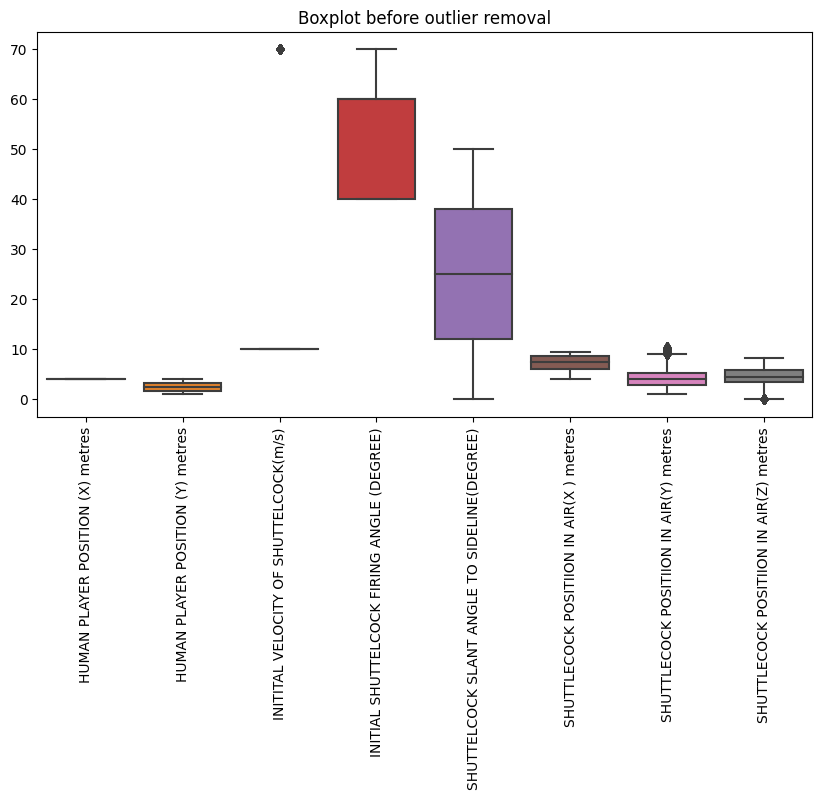


Interquartile Range, Q1, Q3, and outlier thresholds:
HUMAN PLAYER POSITION (X) metres:
Q1: 4.0
Q3: 4.0
IQR: 0.0
Lower outlier threshold: 4.0
Upper outlier threshold: 4.0

HUMAN PLAYER POSITION (Y) metres:
Q1: 1.75
Q3: 3.25
IQR: 1.5
Lower outlier threshold: -0.5
Upper outlier threshold: 5.5

INITITAL VELOCITY OF SHUTTELCOCK(m/s):
Q1: 10.0
Q3: 10.0
IQR: 0.0
Lower outlier threshold: 10.0
Upper outlier threshold: 10.0

INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE):
Q1: 40.0
Q3: 60.0
IQR: 20.0
Lower outlier threshold: 10.0
Upper outlier threshold: 90.0

SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE):
Q1: 12.0
Q3: 38.0
IQR: 26.0
Lower outlier threshold: -27.0
Upper outlier threshold: 77.0

SHUTTLECOCK POSITIION IN AIR(X ) metres:
Q1: 5.98148191375
Q3: 8.598972986
IQR: 2.61749107225
Lower outlier threshold: 2.0552453053749997
Upper outlier threshold: 12.525209594375

SHUTTLECOCK POSITIION IN AIR(Y) metres:
Q1: 2.7920586095
Q3: 5.2696768645
IQR: 2.477618255
Lower outlier threshold: -0.92436877299999

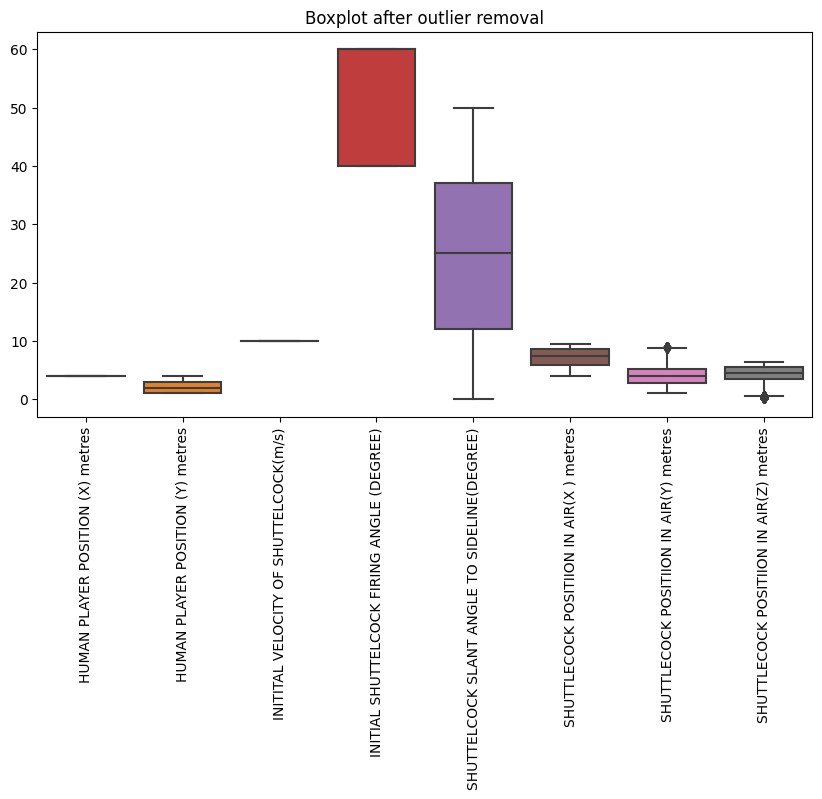

,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,SHOT_ID
10000,4,1,10,40,0,4.074748,1.000000,2.664781,101
10001,4,1,10,40,0,4.152552,1.000000,2.727645,101
10002,4,1,10,40,0,4.225975,1.000000,2.787371,101
10003,4,1,10,40,0,4.302336,1.000000,2.847031,101
10004,4,1,10,40,0,4.377311,1.000000,2.905658,101
...,...,...,...,...,...,...,...,...,...
161506,4,4,10,60,50,8.061748,8.840603,6.084177,1615
161507,4,4,10,60,50,8.088022,8.871915,6.044289,1615
161508,4,4,10,60,50,8.111243,8.899588,6.001045,1615
161509,4,4,10,60,50,8.138342,8.931884,5.952024,1615


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print initial data shape
print(f"\nInitial shape: {data2.shape}")

# Plotting before outlier removal
plt.figure(figsize=(10,5))
plt.title('Boxplot before outlier removal')
sns.boxplot(data=data2.iloc[:, :-1])  # Exclude the last column (SHOT_ID)
plt.xticks(rotation=90)
plt.show()

# Calculate Q1, Q3, and IQR
Q1 = data2.iloc[:, :-1].quantile(0.25)  # Exclude the last column (SHOT_ID)
Q3 = data2.iloc[:, :-1].quantile(0.75)  # Exclude the last column (SHOT_ID)
IQR = Q3 - Q1

print("\nInterquartile Range, Q1, Q3, and outlier thresholds:")  
for col in data2.columns[:-1]:  # Exclude the last column (SHOT_ID)
    print(f"{col}:")
    print(f"Q1: {Q1[col]}") 
    print(f"Q3: {Q3[col]}") 
    print(f"IQR: {IQR[col]}")
    print(f"Lower outlier threshold: {Q1[col] - 1.5 * IQR[col]}")
    print(f"Upper outlier threshold: {Q3[col] + 1.5 * IQR[col]}\n")

# Identify outlier rows before removing them
outlier_mask = ((data2.iloc[:, :-1] < (Q1 - 1.5 * IQR)) | (data2.iloc[:, :-1] > (Q3 + 1.5 * IQR))).any(axis=1)

# Create a dataframe of outliers
data2_outliers = data2[outlier_mask].copy()

# Save outliers to CSV
data2_outliers.to_csv("outliers.csv", index=False)

# Filter out outliers
data2_no_outliers = data2[~outlier_mask]

# Calculate and print number of rows removed
removed_rows_outliers = data2.shape[0] - data2_no_outliers.shape[0]
print(f"\nData after removing outliers: (removed {removed_rows_outliers} rows)")

# Print updated data shape
print(f"Current shape: {data2_no_outliers.shape}")

# Plotting after outlier removal
plt.figure(figsize=(10,5))
plt.title('Boxplot after outlier removal')
sns.boxplot(data=data2_no_outliers.iloc[:, :-1])  # Exclude the last column (SHOT_ID)
plt.xticks(rotation=90)
plt.show()

# Update data2 to data2_no_outliers
data2 = data2_no_outliers
data2


Check data that is served out of court

In [11]:
import numpy as np

# Define court dimensions
court_length = 13.4  # in metres
court_width = 5.18  # in metres

# Initialize 'OUT_OF_COURT_SHOTS' column
data2 = data2.assign(OUT_OF_COURT_SHOTS = np.nan)

# Assign values to 'OUT_OF_COURT_SHOTS' column
data2['OUT_OF_COURT_SHOTS'] = np.where((data2['SHUTTLECOCK POSITIION IN AIR(X ) metres'] > court_length) | 
                                     (data2['SHUTTLECOCK POSITIION IN AIR(Y) metres'] > court_width), 0, 1)

# Count the number of 'IN' and 'OUT' rows
in_court = data2['OUT_OF_COURT_SHOTS'].sum()
out_of_court = data2.shape[0] - in_court

print(f"Number of 'IN' rows: {in_court}")
print(f"Number of 'OUT' rows: {out_of_court}")
data2

Number of 'IN' rows: 42321
Number of 'OUT' rows: 14315


,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,SHOT_ID,OUT_OF_COURT_SHOTS
10000,4,1,10,40,0,4.074748,1.000000,2.664781,101,1
10001,4,1,10,40,0,4.152552,1.000000,2.727645,101,1
10002,4,1,10,40,0,4.225975,1.000000,2.787371,101,1
10003,4,1,10,40,0,4.302336,1.000000,2.847031,101,1
10004,4,1,10,40,0,4.377311,1.000000,2.905658,101,1
...,...,...,...,...,...,...,...,...,...,...
161506,4,4,10,60,50,8.061748,8.840603,6.084177,1615,0
161507,4,4,10,60,50,8.088022,8.871915,6.044289,1615,0
161508,4,4,10,60,50,8.111243,8.899588,6.001045,1615,0
161509,4,4,10,60,50,8.138342,8.931884,5.952024,1615,0


Re-number SHOT_ID after removed abnormal data rows

In [12]:
# Create sorted list of unique shotIds
shotIds = sorted(data2['SHOT_ID'].unique())

# Map old shotIds to new shotIds
map_dict = {old_id: new_id for new_id, old_id in enumerate(shotIds, start=1)}

# Replace old shotIds with new shotIds
data2.loc[:, 'SHOT_ID'] = data2['SHOT_ID'].replace(map_dict)

# Reorder columns
data2 = data2[['SHOT_ID', 'HUMAN PLAYER POSITION (X) metres', 'HUMAN PLAYER POSITION (Y) metres',
         'INITITAL VELOCITY OF SHUTTELCOCK(m/s)', 'INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE)',
         'SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE)', 'SHUTTLECOCK POSITIION IN AIR(X ) metres',
         'SHUTTLECOCK POSITIION IN AIR(Y) metres', 'SHUTTLECOCK POSITIION IN AIR(Z) metres', 'OUT_OF_COURT_SHOTS']]

data2

,SHOT_ID,HUMAN PLAYER POSITION (X) metres,HUMAN PLAYER POSITION (Y) metres,INITITAL VELOCITY OF SHUTTELCOCK(m/s),INITIAL SHUTTELCOCK FIRING ANGLE (DEGREE),SHUTTELCOCK SLANT ANGLE TO SIDELINE(DEGREE),SHUTTLECOCK POSITIION IN AIR(X ) metres,SHUTTLECOCK POSITIION IN AIR(Y) metres,SHUTTLECOCK POSITIION IN AIR(Z) metres,OUT_OF_COURT_SHOTS
10000,1,4,1,10,40,0,4.074748,1.000000,2.664781,1
10001,1,4,1,10,40,0,4.152552,1.000000,2.727645,1
10002,1,4,1,10,40,0,4.225975,1.000000,2.787371,1
10003,1,4,1,10,40,0,4.302336,1.000000,2.847031,1
10004,1,4,1,10,40,0,4.377311,1.000000,2.905658,1
...,...,...,...,...,...,...,...,...,...,...
161506,408,4,4,10,60,50,8.061748,8.840603,6.084177,0
161507,408,4,4,10,60,50,8.088022,8.871915,6.044289,0
161508,408,4,4,10,60,50,8.111243,8.899588,6.001045,0
161509,408,4,4,10,60,50,8.138342,8.931884,5.952024,0


In [13]:
#Save grouped and cleaned data into a new csv file
data2.to_csv("badmintondata2_cleaned_data.csv", index=False)